<a href="https://colab.research.google.com/github/Ddhawan2003/DSA/blob/main/Bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


📊 Final Results:
Scenario 0: Avg reward = $-319,136.32 | Chosen 4 times
Scenario 1: Avg reward = $-281,115.23 | Chosen 90 times
Scenario 2: Avg reward = $-297,576.37 | Chosen 6 times


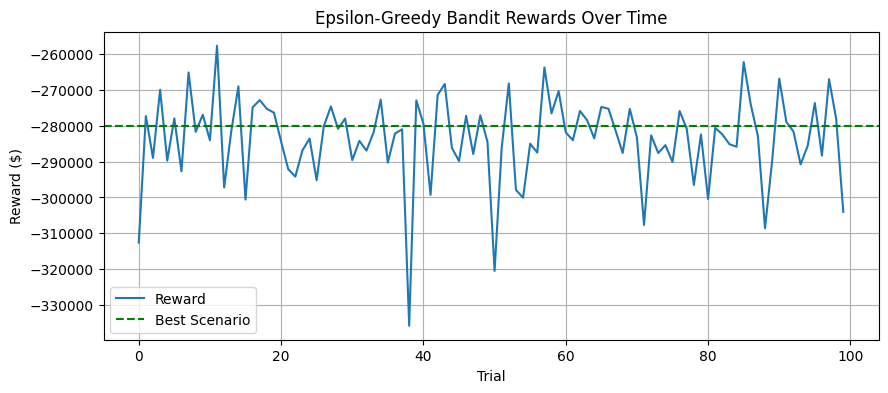

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define 3 fixed scenarios (drug mixes)
scenarios = {
    0: {"Drug A": 0.4, "Drug B": 0.3, "Drug C": 0.3},
    1: {"Drug A": 0.5, "Drug B": 0.2, "Drug C": 0.3},
    2: {"Drug A": 0.3, "Drug B": 0.4, "Drug C": 0.3},
}

# True reward (profit) for each scenario
true_rewards = {
    0: -320000,
    1: -280000,  # Best scenario
    2: -300000,
}

# Bandit parameters
n_scenarios = len(scenarios)
n_trials = 100
epsilon = 0.1  # 10% explore, 90% exploit

rewards = np.zeros(n_scenarios)
counts = np.zeros(n_scenarios)
average_rewards = []

# Epsilon-Greedy loop
for t in range(n_trials):
    # Choose scenario
    if np.random.rand() < epsilon:
        action = np.random.randint(n_scenarios)  # Explore
    else:
        action = np.argmax(rewards / (counts + 1e-5))  # Exploit

    # Simulate noisy reward
    reward = true_rewards[action] + np.random.normal(0, 10000)

    # Update tracking
    counts[action] += 1
    rewards[action] += reward
    average_rewards.append(reward)

# Final output
print("\n📊 Final Results:")
for i in range(n_scenarios):
    avg = rewards[i] / counts[i]
    print(f"Scenario {i}: Avg reward = ${avg:,.2f} | Chosen {int(counts[i])} times")

# Plotting reward over time
plt.figure(figsize=(10, 4))
plt.plot(average_rewards, label="Reward")
plt.axhline(true_rewards[1], color='green', linestyle='--', label='Best Scenario')
plt.title("Epsilon-Greedy Bandit Rewards Over Time")
plt.xlabel("Trial")
plt.ylabel("Reward ($)")
plt.legend()
plt.grid(True)
plt.show()

Generating valid scenarios that meet min usage constraints...

✅ Generated 10 valid scenarios after 580 attempts.


--- Iteration 1 ---
Scenario 3 selected by Thompson Sampling.
Evaluating scenario:
  Bevacizumab - Usage: 32.0% | Rebate Eligible: Yes | Rebate: $16005.65
  Zirabev - Usage: 20.5% | Rebate Eligible: Yes | Rebate: $11272.09
  Avastin - Usage: 20.7% | Rebate Eligible: Yes | Rebate: $8268.90
  Mvasi - Usage: 16.5% | Rebate Eligible: No | Rebate: $0.00
  Alymsys - Usage: 10.3% | Rebate Eligible: No | Rebate: $0.00
Net Outcome: $196,204.33


--- Iteration 2 ---
Scenario 9 selected by Thompson Sampling.
Evaluating scenario:
  Bevacizumab - Usage: 21.4% | Rebate Eligible: Yes | Rebate: $10706.27
  Zirabev - Usage: 30.8% | Rebate Eligible: Yes | Rebate: $16918.45
  Avastin - Usage: 21.0% | Rebate Eligible: Yes | Rebate: $8389.58
  Mvasi - Usage: 14.0% | Rebate Eligible: No | Rebate: $0.00
  Alymsys - Usage: 12.8% | Rebate Eligible: No | Rebate: $0.00
Net Outcome: $200,670.13


--

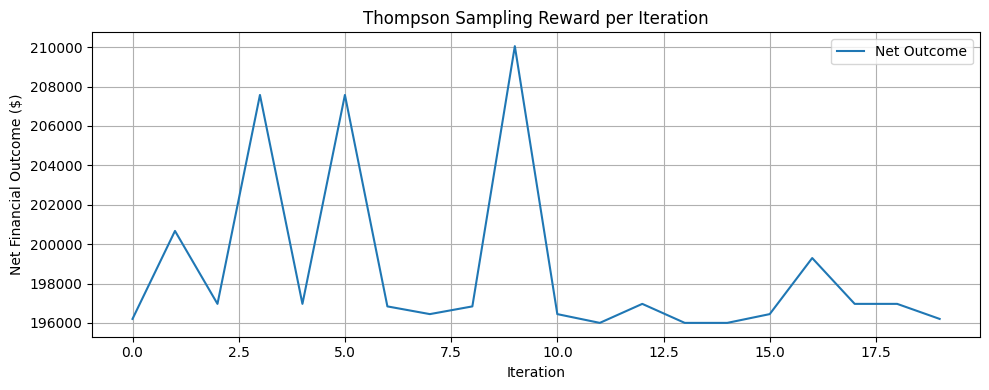

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: Define the Drug Data
# ----------------------------
df = pd.DataFrame({
    "drug_name": ["Bevacizumab", "Zirabev", "Avastin", "Mvasi", "Alymsys"],
    "net_cost": [450, 400, 470, 395, 390],
    "rebate_per_unit": [50, 55, 40, 60, 65],
    "rebate_threshold": [0.2, 0.2, 0.2, 0.2, 0.2],
    "reimbursement": [600, 590, 580, 585, 580],
    "min_usage": [0.2, 0.2, 0.2, 0.1, 0.1]  # Adjusted slightly to allow feasible sampling
})

# ----------------------------
# Step 2: Generate Valid Scenarios
# ----------------------------
def generate_valid_scenarios(df, num_scenarios=10, max_attempts=2000):
    print("Generating valid scenarios that meet min usage constraints...\n")
    valid_scenarios = []
    n = len(df)
    attempts = 0
    while len(valid_scenarios) < num_scenarios and attempts < max_attempts:
        mix = np.random.dirichlet(np.ones(n) * 3, size=1).flatten()  # bias toward even distribution
        if all(mix[i] >= df["min_usage"].iloc[i] for i in range(n)):
            valid_scenarios.append(mix)
        attempts += 1
    if len(valid_scenarios) == 0:
        print("❌ No valid scenarios could be generated. Please adjust min_usage or retry.")
    else:
        print(f"✅ Generated {len(valid_scenarios)} valid scenarios after {attempts} attempts.\n")
    return np.array(valid_scenarios)

# ----------------------------
# Step 3: Compute Financial Outcome
# ----------------------------
def compute_financial_outcome(df, mix, total_units=1000):
    total_cost, total_rebate, total_reimbursement = 0, 0, 0
    print("Evaluating scenario:")
    for i in range(len(df)):
        units = total_units * mix[i]
        cost = units * df["net_cost"].iloc[i]
        reimbursement = units * df["reimbursement"].iloc[i]
        rebate = 0
        if mix[i] >= df["rebate_threshold"].iloc[i]:
            rebate = units * df["rebate_per_unit"].iloc[i]
            qualified = "Yes"
        else:
            qualified = "No"
        print(f"  {df['drug_name'].iloc[i]} - Usage: {mix[i]*100:.1f}% | Rebate Eligible: {qualified} | Rebate: ${rebate:.2f}")
        total_cost += cost
        total_rebate += rebate
        total_reimbursement += reimbursement
    net = total_reimbursement - total_cost + total_rebate
    print(f"Net Outcome: ${net:,.2f}\n")
    return net

# ----------------------------
# Step 4: Run Thompson Sampling
# ----------------------------
scenarios = generate_valid_scenarios(df, num_scenarios=10)
if len(scenarios) == 0:
    raise RuntimeError("No valid scenarios. Exiting.")

alpha = np.ones(len(scenarios))
beta = np.ones(len(scenarios))
rewards = []

for t in range(20):
    print(f"\n--- Iteration {t + 1} ---")
    samples = np.random.beta(alpha, beta)
    chosen = np.argmax(samples)
    print(f"Scenario {chosen} selected by Thompson Sampling.")
    reward = compute_financial_outcome(df, scenarios[chosen])
    norm_reward = (reward + 1e6) / 2e6
    norm_reward = np.clip(norm_reward, 0, 1)
    alpha[chosen] += norm_reward
    beta[chosen] += (1 - norm_reward)
    rewards.append(reward)

# ----------------------------
# Step 5: Show Best Scenario
# ----------------------------
print("\n=== Best Scenario Found ===")
final_rewards = [compute_financial_outcome(df, s) for s in scenarios]
best_idx = np.argmax(final_rewards)
best_mix = scenarios[best_idx]
for i, drug in enumerate(df["drug_name"]):
    print(f"{drug}: {best_mix[i]*100:.1f}%")

print(f"\nBest Net Outcome: ${final_rewards[best_idx]:,.2f}")

plt.figure(figsize=(10, 4))
plt.plot(rewards, label="Net Outcome")
plt.title("Thompson Sampling Reward per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Net Financial Outcome ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Iteration 1: Chose scenario 0 with reward 197190.24
Iteration 2: Chose scenario 0 with reward 197190.24
Iteration 3: Chose scenario 0 with reward 197190.24
Iteration 4: Chose scenario 0 with reward 197190.24
Iteration 5: Chose scenario 0 with reward 197190.24
Iteration 6: Chose scenario 0 with reward 197190.24
Iteration 7: Chose scenario 0 with reward 197190.24
Iteration 8: Chose scenario 0 with reward 197190.24
Iteration 9: Chose scenario 0 with reward 197190.24
Iteration 10: Chose scenario 0 with reward 197190.24
Iteration 11: Chose scenario 0 with reward 197190.24
Iteration 12: Chose scenario 0 with reward 197190.24
Iteration 13: Chose scenario 0 with reward 197190.24
Iteration 14: Chose scenario 0 with reward 197190.24
Iteration 15: Chose scenario 0 with reward 197190.24
Iteration 16: Chose scenario 0 with reward 197190.24
Iteration 17: Chose scenario 0 with reward 197190.24
Iteration 18: Chose scenario 0 with reward 197190.24
Iteration 19: Chose scenario 3 with reward 197168.24
It

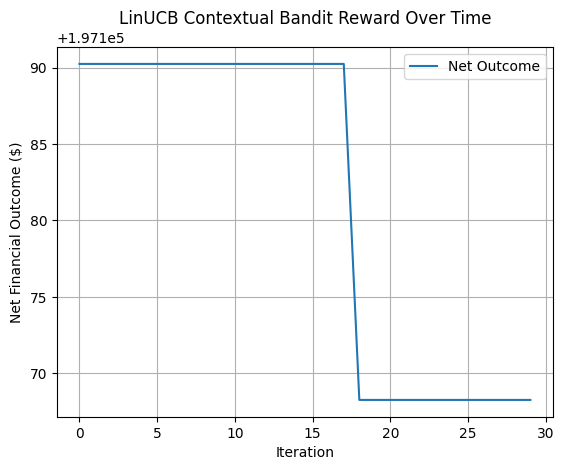

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: Define the Drug Data
# ----------------------------
df = pd.DataFrame({
    "drug_name": ["Bevacizumab", "Zirabev", "Avastin", "Mvasi", "Alymsys"],
    "net_cost": [450, 400, 470, 395, 390],
    "rebate_per_unit": [50, 55, 40, 60, 65],
    "rebate_threshold": [0.2, 0.2, 0.2, 0.2, 0.2],
    "reimbursement": [600, 590, 580, 585, 580],
    "min_usage": [0.2, 0.2, 0.2, 0.1, 0.1]
})

# ----------------------------
# Step 2: Generate Valid Scenarios
# ----------------------------
def generate_valid_scenarios(df, num_scenarios=10, max_attempts=2000):
    valid_scenarios = []
    n = len(df)
    attempts = 0
    while len(valid_scenarios) < num_scenarios and attempts < max_attempts:
        mix = np.random.dirichlet(np.ones(n) * 3, size=1).flatten()
        if all(mix[i] >= df["min_usage"].iloc[i] for i in range(n)):
            valid_scenarios.append(mix)
        attempts += 1
    return np.array(valid_scenarios)

# ----------------------------
# Step 3: Compute Financial Outcome (Reward)
# ----------------------------
def compute_financial_outcome(df, mix, total_units=1000):
    total_cost, total_rebate, total_reimbursement = 0, 0, 0
    for i in range(len(df)):
        units = total_units * mix[i]
        cost = units * df["net_cost"].iloc[i]
        reimbursement = units * df["reimbursement"].iloc[i]
        rebate = 0
        if mix[i] >= df["rebate_threshold"].iloc[i]:
            rebate = units * df["rebate_per_unit"].iloc[i]
        total_cost += cost
        total_rebate += rebate
        total_reimbursement += reimbursement
    net = total_reimbursement - total_cost + total_rebate
    return net

# ----------------------------
# Step 4: Simulate Context for Each Scenario
# ----------------------------
# Features: [payer_mix, avg_age, cancer_type]
# Values normalized 0-1 for simplicity
np.random.seed(42)
num_scenarios = 10
contexts = np.random.rand(num_scenarios, 3)  # Simulate context vectors

# ----------------------------
# Step 5: Implement LinUCB Algorithm
# ----------------------------
class LinUCB:
    def __init__(self, n_arms, n_features, alpha=1.0):
        self.n_arms = n_arms
        self.n_features = n_features
        self.alpha = alpha

        # For each arm, maintain A (d x d matrix) and b (d vector)
        self.A = [np.identity(n_features) for _ in range(n_arms)]
        self.b = [np.zeros(n_features) for _ in range(n_arms)]

    def select_arm(self, context_vectors):
        p_values = []
        for arm in range(self.n_arms):
            A_inv = np.linalg.inv(self.A[arm])
            theta = A_inv.dot(self.b[arm])
            x = context_vectors[arm]
            p = theta.dot(x) + self.alpha * np.sqrt(x.dot(A_inv).dot(x))
            p_values.append(p)
        return np.argmax(p_values)

    def update(self, chosen_arm, context, reward):
        self.A[chosen_arm] += np.outer(context, context)
        self.b[chosen_arm] += reward * context

# ----------------------------
# Step 6: Run LinUCB for Contextual Bandit
# ----------------------------
# Generate scenarios
scenarios = generate_valid_scenarios(df, num_scenarios=num_scenarios)
linucb = LinUCB(n_arms=num_scenarios, n_features=3, alpha=1.0)

rewards = []

for t in range(30):
    chosen = linucb.select_arm(contexts)
    reward = compute_financial_outcome(df, scenarios[chosen])

    # Optionally normalize reward (e.g. to [0,1]) - here simple min-max norm with arbitrary bounds
    norm_reward = (reward - 0) / 10000  # Adjust denominator based on expected reward scale
    norm_reward = np.clip(norm_reward, 0, 1)

    linucb.update(chosen, contexts[chosen], norm_reward)
    rewards.append(reward)

    print(f"Iteration {t+1}: Chose scenario {chosen} with reward {reward:.2f}")

# ----------------------------
# Step 7: Display best scenario found
# ----------------------------
best_idx = np.argmax(rewards)
best_mix = scenarios[best_idx]

print("\n=== Best Scenario Found ===")
for i, drug in enumerate(df["drug_name"]):
    print(f"{drug}: {best_mix[i]*100:.1f}%")
print(f"Best Net Outcome: ${rewards[best_idx]:,.2f}")

plt.plot(rewards, label="Net Outcome")
plt.xlabel("Iteration")
plt.ylabel("Net Financial Outcome ($)")
plt.title("LinUCB Contextual Bandit Reward Over Time")
plt.grid()
plt.legend()
plt.show()

In [ ]:
# 2. Install Streamlit & pyngrok
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
# 1. Write the app.py file
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "practice": ["Practice A"] * 5 + ["Practice B"] * 5,
    "drug_name": ["Bevacizumab", "Zirabev", "Avastin", "Mvasi", "Alymsys"] * 2,
    "net_cost": [450, 400, 470, 395, 390, 460, 410, 480, 400, 395],
    "rebate_per_unit": [50, 55, 40, 60, 65, 45, 50, 35, 55, 60],
    "rebate_threshold": [0.2, 0.2, 0.2, 0.2, 0.2]*2,
    "reimbursement": [600, 590, 580, 585, 580, 610, 600, 590, 595, 590],
    "min_usage": [0.2, 0.2, 0.2, 0.1, 0.1]*2
}
df = pd.DataFrame(data)

def generate_scenarios(df, num_scenarios=10):
    n = len(df[df["practice"] == df["practice"].iloc[0]])
    scenarios = []
    names = [f"Strategy {i+1}" for i in range(num_scenarios)]
    for _ in range(num_scenarios):
        while True:
            mix = np.random.dirichlet(np.ones(n)*3)
            if all(mix[i] >= df["min_usage"].iloc[i] for i in range(n)):
                scenarios.append(mix)
                break
    return names, np.array(scenarios)

strategy_names, strategies = generate_scenarios(df)

def compute_outcome_for_practice(df, practice, mix, total_units=1000):
    subset = df[df["practice"] == practice].reset_index(drop=True)
    total_cost, total_rebate, total_reimbursement = 0, 0, 0
    for i in range(len(subset)):
        units = total_units * mix[i]
        cost = units * subset["net_cost"].iloc[i]
        reimbursement = units * subset["reimbursement"].iloc[i]
        rebate = 0
        if mix[i] >= subset["rebate_threshold"].iloc[i]:
            rebate = units * subset["rebate_per_unit"].iloc[i]
        total_cost += cost
        total_rebate += rebate
        total_reimbursement += reimbursement
    net = total_reimbursement - total_cost + total_rebate
    return net

st.title("Drug Mix Scenario Financial Outcomes")

practice_list = df["practice"].unique()
selected_practice = st.selectbox("Select Practice/Physician:", practice_list)

st.write(f"Showing results for: **{selected_practice}**")

results = []
for i, mix in enumerate(strategies):
    outcome = compute_outcome_for_practice(df, selected_practice, mix)
    results.append((strategy_names[i], outcome))

results_df = pd.DataFrame(results, columns=["Strategy", "Net Financial Outcome"])

st.dataframe(results_df.style.format({"Net Financial Outcome": "${:,.2f}"}))

best_idx = results_df["Net Financial Outcome"].idxmax()
best_strategy = results_df.loc[best_idx, "Strategy"]
best_outcome = results_df.loc[best_idx, "Net Financial Outcome"]

st.markdown(f"### Best Strategy: **{best_strategy}** with Net Outcome: **${best_outcome:,.2f}**")

selected_strategy = st.selectbox("Select a Strategy to View Details:", strategy_names)
selected_index = strategy_names.index(selected_strategy)
selected_mix = strategies[selected_index]

subset = df[df["practice"] == selected_practice].reset_index(drop=True)
st.write("### Selected Strategy Drug Mix & Eligibility")
drug_info = []
for i in range(len(subset)):
    usage_pct = selected_mix[i] * 100
    eligible = "Yes" if selected_mix[i] >= subset["rebate_threshold"].iloc[i] else "No"
    drug_info.append({
        "Drug": subset["drug_name"].iloc[i],
        "Usage %": f"{usage_pct:.1f}%",
        "Rebate Eligible": eligible
    })
st.table(pd.DataFrame(drug_info))

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(results_df["Strategy"], results_df["Net Financial Outcome"])
ax.set_ylabel("Net Financial Outcome ($)")
ax.set_title(f"Financial Outcomes for {selected_practice}")
ax.tick_params(axis='x', rotation=45)
st.pyplot(fig)

Overwriting app.py


In [ ]:
# 3. Run streamlit with ngrok
from pyngrok import ngrok
import os

public_url = ngrok.connect(port=8501)
print(f"Streamlit URL: {public_url}")

os.system("streamlit run app.py &")

PyngrokNgrokHTTPError: ngrok client exception, API returned 400: {"error_code":102,"status_code":400,"msg":"invalid tunnel configuration","details":{"err":"yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"}}


In [ ]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Define clinical equivalent groups and drugs per group
clinical_groups = {
    "Bevacizumab Group": ["Avastin", "Mvasi", "Zirabev"],
    "Trastuzumab Group": ["Herceptin", "Kanjinti", "Ogivri"],
    "Rituximab Group": ["Rituxan", "Truxima", "Ruxience"],
    "Immunotherapy Group": ["Opdivo", "Nivolumab Biosimilar", "Yervoy"]
}

# Drug categories by drug (just example mappings)
drug_categories = {
    "Avastin": "Biosimilar",
    "Mvasi": "Biosimilar",
    "Zirabev": "Branded",
    "Herceptin": "Branded",
    "Kanjinti": "Biosimilar",
    "Ogivri": "Biosimilar",
    "Rituxan": "Branded",
    "Truxima": "Biosimilar",
    "Ruxience": "Biosimilar",
    "Opdivo": "Branded",
    "Nivolumab Biosimilar": "Biosimilar",
    "Yervoy": "Other"
}

practices = ["P001", "P002", "P003", "P004", "P005"]
locations = ["Indiana", "Ohio", "Michigan", "California", "Illinois"]
cancer_types = ["Colon Cancer", "Breast Cancer", "Lung Cancer", "Melanoma", "Lymphoma"]
rebate_types = ["unit", "share"]
threshold_conditions = ["units >= 100", "usage_share >= 0.20", "units >= 80", "usage_share >= 0.15"]

rows = []

for group, drugs in clinical_groups.items():
    for drug in drugs:
        for practice in practices:
            net_cost = np.random.randint(380, 500)
            reimbursement = net_cost + np.random.randint(50, 130)
            rebate_per_unit = np.random.randint(30, 70)
            rebate_threshold = round(np.random.uniform(0.15, 0.25), 2)
            drug_cat = drug_categories.get(drug, "Other")
            min_usage = round(np.random.uniform(0.05, 0.15), 3)
            payer_mix_medicare = round(np.random.uniform(0.4, 0.7), 3)
            payer_mix_medicaid = round(np.random.uniform(0.15, 0.3), 3)
            payer_mix_commercial = round(1 - payer_mix_medicare - payer_mix_medicaid, 3)
            avg_patient_age = np.random.randint(55, 80)
            cancer_type = np.random.choice(cancer_types)
            location = np.random.choice(locations)
            rebate_type = np.random.choice(rebate_types)
            threshold_condition = np.random.choice(threshold_conditions)
            lock_in = np.random.choice([True, False], p=[0.6, 0.4])
            blacklist = np.random.choice([True, False], p=[0.1, 0.9])

            rows.append({
                "drug_name": drug,
                "net_cost": net_cost,
                "reimbursement": reimbursement,
                "rebate_per_unit": rebate_per_unit,
                "rebate_threshold": rebate_threshold,
                "clinical_equivalent_group": group,
                "drug_category": drug_cat,
                "min_usage": min_usage,
                "practice_id": practice,
                "payer_mix_medicare": payer_mix_medicare,
                "payer_mix_medicaid": payer_mix_medicaid,
                "payer_mix_commercial": payer_mix_commercial,
                "avg_patient_age": avg_patient_age,
                "cancer_type_majority": cancer_type,
                "location": location,
                "rebate_type": rebate_type,
                "threshold_condition": threshold_condition,
                "lock_in": lock_in,
                "blacklist": blacklist
            })

# Create DataFrame and save to CSV
df = pd.DataFrame(rows)
csv_path = "drug_data.csv"
df.to_csv(csv_path, index=False)

print(f"CSV saved at {csv_path}")

CSV saved at drug_data.csv


In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
!mv ngrok /usr/local/bin/ngrok
!ngrok version

--2025-06-11 20:30:05--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 35.71.179.82, 99.83.220.108, 75.2.60.68, ...
Connecting to bin.equinox.io (bin.equinox.io)|35.71.179.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  17.3MB/s    in 0.8s    

2025-06-11 20:30:07 (17.3 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
ngrok version 2.3.41


In [ ]:
# Step 3: Authenticate ngrok
!ngrok authtoken 2y7i11x0w14237vkdAqu3cSmt5V_3LKpa37izRY2sTeHuqncT

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# ----- Step 1: Load your CSV -----
df = pd.read_csv("drug_data.csv")

# ----- Step 2: Preprocess data -----
# Pivot to get drug categories as columns with min_usage or initial usage (or zeros)
# Aggregate context features at practice level

# Unique practices
practices = df['practice_id'].unique()

# Extract context features (payer mixes + avg_patient_age + location encoded + cancer_type_majority encoded)
context_features = ['payer_mix_medicare', 'payer_mix_medicaid', 'payer_mix_commercial', 'avg_patient_age', 'location', 'cancer_type_majority']

# Encode categorical context features: location and cancer_type_majority
cat_cols = ['location', 'cancer_type_majority']
ohe = OneHotEncoder(sparse_output=False)
encoded_cats = ohe.fit_transform(df[cat_cols])
encoded_cat_df = pd.DataFrame(encoded_cats, columns=ohe.get_feature_names_out(cat_cols))

# Append encoded categories back to df
df_enc = pd.concat([df.reset_index(drop=True), encoded_cat_df], axis=1)
df_enc = df_enc.drop(columns=cat_cols)

# Aggregate context features per practice by taking mean (for numeric) or first for categorical
context_agg_cols = ['payer_mix_medicare', 'payer_mix_medicaid', 'payer_mix_commercial', 'avg_patient_age'] + list(encoded_cat_df.columns)

practice_contexts = df_enc.groupby('practice_id')[context_agg_cols].mean()

# Get unique drug categories
drug_categories = df['drug_category'].unique()

# Create initial action vector per practice (e.g. min_usage or zero)
# For simplicity, let's create an initial usage vector of zeros per drug_category per practice
practice_action_init = pd.DataFrame(0, index=practice_contexts.index, columns=drug_categories)

# Let's get min_usage per drug_category (take mean min_usage for that category)
min_usage_map = df.groupby('drug_category')['min_usage'].mean().to_dict()

# ----- Reward function -----
# For each practice and drug category, calculate net_cost_effective = net_cost - rebate
# rebate = rebate_per_unit * max(usage - rebate_threshold, 0)
# Since usage is what we want to optimize, reward = negative net effective cost (min cost == max reward)

def compute_reward(practice_id, usage_weights):
    # usage_weights: vector aligned with drug_categories
    # For each drug category, get relevant rows from df for this practice
    practice_rows = df[df['practice_id'] == practice_id]

    total_cost = 0
    for i, cat in enumerate(drug_categories):
        usage = usage_weights[i]
        cat_rows = practice_rows[practice_rows['drug_category'] == cat]
        # If no drugs in that category for this practice, skip
        if cat_rows.empty:
            continue
        # Average relevant parameters weighted by usage? For simplicity, take mean values across drugs in category for this practice
        net_cost = cat_rows['net_cost'].mean()
        rebate_per_unit = cat_rows['rebate_per_unit'].mean()
        rebate_threshold = cat_rows['rebate_threshold'].mean()

        rebate_units = max(usage - rebate_threshold, 0)
        rebate = rebate_per_unit * rebate_units
        effective_cost = net_cost * usage - rebate  # cost adjusted by rebate
        total_cost += effective_cost
    # Reward = negative total_cost because we want to minimize cost
    return -total_cost

# ----- Thompson Sampling with linear model -----
class LinearThompsonSampling:
    def __init__(self, n_features, n_actions, lambda_=1.0, sigma=1.0):
        self.n_features = n_features
        self.n_actions = n_actions
        self.lambda_ = lambda_
        self.sigma = sigma
        self.d = n_features * n_actions
        self.A = lambda_ * np.eye(self.d)
        self.b = np.zeros(self.d)

    def _features(self, context, action):
        # context shape (n_features,), action shape (n_actions,)
        return np.kron(action, context)

    def sample_theta(self):
        A_inv = np.linalg.inv(self.A)
        mu = A_inv @ self.b
        cov = (self.sigma ** 2) * A_inv
        return np.random.multivariate_normal(mu, cov)

    def select_action(self, context, action_candidates):
        theta_sample = self.sample_theta()
        features = np.array([self._features(context, a) for a in action_candidates])
        rewards = features @ theta_sample
        best_idx = np.argmax(rewards)
        return action_candidates[best_idx]

    def update(self, context, action, reward):
        x = self._features(context, action)
        self.A += np.outer(x, x)
        self.b += reward * x

# ----- Generate candidate actions (usage weights) -----
def generate_action_candidates(n_actions, n_candidates=100):
    candidates = []
    for _ in range(n_candidates):
        # Sample from Dirichlet to get weights summing to 1
        w = np.random.dirichlet(np.ones(n_actions))
        # Clip weights to min_usage per category and renormalize
        for i in range(n_actions):
            if w[i] < min_usage_map[drug_categories[i]]:
                w[i] = min_usage_map[drug_categories[i]]
        w = w / w.sum()
        candidates.append(w)
    return np.array(candidates)

# ----- Prepare data -----
contexts = practice_contexts.values
n_features = contexts.shape[1]
n_actions = len(drug_categories)

bandit = LinearThompsonSampling(n_features, n_actions)

action_candidates = generate_action_candidates(n_actions, n_candidates=200)

practice_ids = practice_contexts.index.tolist()

# ----- Training loop -----
n_epochs = 30
for epoch in range(n_epochs):
    for i, practice_id in enumerate(practice_ids):
        context = contexts[i]
        action = bandit.select_action(context, action_candidates)
        reward = compute_reward(practice_id, action)
        bandit.update(context, action, reward)
    if epoch % 5 == 0:
        print(f"Epoch {epoch} complete")

# ----- Get best strategies learned -----
best_strategies = []
manual_strategies = []

# Manual baseline: average usage weights from data per practice (aggregate min_usage per category)
# Or simply uniform weights clipped at min_usage and normalized
manual_weights = np.array([min_usage_map[cat] for cat in drug_categories])
manual_weights = manual_weights / manual_weights.sum()

for i, practice_id in enumerate(practice_ids):
    context = contexts[i]
    best_action = bandit.select_action(context, action_candidates)
    best_strategies.append(best_action)
    manual_strategies.append(manual_weights)

# ----- Evaluate rewards for learned vs manual -----
learned_rewards = []
manual_rewards = []
for i, practice_id in enumerate(practice_ids):
    learned_rewards.append(compute_reward(practice_id, best_strategies[i]))
    manual_rewards.append(compute_reward(practice_id, manual_strategies[i]))

print(f"Average learned strategy reward (negative cost): {np.mean(learned_rewards):.3f}")
print(f"Average manual strategy reward (negative cost): {np.mean(manual_rewards):.3f}")

# ----- Save results -----
results_df = practice_contexts.copy()
for idx, cat in enumerate(drug_categories):
    results_df[f"learned_{cat}"] = [w[idx] for w in best_strategies]
    results_df[f"manual_{cat}"] = manual_weights[idx]

results_df['learned_reward'] = learned_rewards
results_df['manual_reward'] = manual_rewards

results_df.to_csv("practice_learned_vs_manual.csv")
print("Saved detailed results to practice_learned_vs_manual.csv")

Epoch 0 complete
Epoch 5 complete
Epoch 10 complete
Epoch 15 complete
Epoch 20 complete
Epoch 25 complete
Average learned strategy reward (negative cost): -397.155
Average manual strategy reward (negative cost): -424.767
Saved detailed results to practice_learned_vs_manual.csv


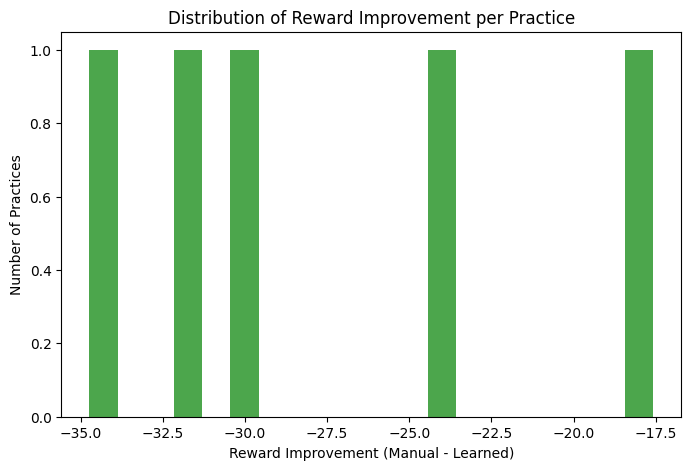

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('practice_learned_vs_manual.csv')
df['reward_diff'] = df['manual_reward'] - df['learned_reward']

plt.figure(figsize=(8,5))
plt.hist(df['reward_diff'], bins=20, color='green', alpha=0.7)
plt.xlabel('Reward Improvement (Manual - Learned)')
plt.ylabel('Number of Practices')
plt.title('Distribution of Reward Improvement per Practice')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

def generate_synthetic_data(num_practices=10, drugs_per_practice=5, seed=42, output_file="synthetic_drug_data.csv"):
    np.random.seed(seed)

    # Define base values
    drug_names = ['Avastin', 'Zirabev', 'MabThera', 'Remicade']
    categories = ['Biosimilar', 'Branded', 'Other']
    groups = {
        'Avastin': 'Bevacizumab Group',
        'Zirabev': 'Bevacizumab Group',
        'MabThera': 'Rituximab Group',
        'Remicade': 'Rituximab Group'
    }
    rebate_types = ['share', 'unit']
    threshold_conditions = ['units >= 100', 'usage_share >= 0.15']
    cancer_types = ['Lung Cancer', 'Melanoma', 'Breast Cancer']
    locations = ['Michigan', 'Ohio', 'California', 'Indiana']

    # Generate static drug info by (drug_name, category)
    drug_info = {}
    for drug in drug_names:
        for category in categories:
            key = (drug, category)
            net_cost = np.round(np.random.uniform(300, 600), 2)
            reimbursement = np.round(net_cost * np.random.uniform(1.1, 1.3), 2)
            rebate_per_unit = np.round(np.random.uniform(10, 60), 2)
            rebate_threshold = np.round(np.random.uniform(0.1, 0.3), 2)
            rebate_type = np.random.choice(rebate_types)
            threshold_condition = np.random.choice(threshold_conditions)
            group = groups[drug]
            drug_info[key] = {
                'net_cost': net_cost,
                'reimbursement': reimbursement,
                'rebate_per_unit': rebate_per_unit,
                'rebate_threshold': rebate_threshold,
                'clinical_equivalent_group': group,
                'drug_category': category,
                'rebate_type': rebate_type,
                'threshold_condition': threshold_condition
            }

    # Generate static practice info
    practice_info = {}
    for i in range(num_practices):
        practice_id = f"P{i+1:03d}"
        payer_mix_medicare = np.round(np.random.uniform(0, 1), 3)
        payer_mix_medicaid = np.round(np.random.uniform(0, 1 - payer_mix_medicare), 3)
        payer_mix_commercial = np.round(1 - payer_mix_medicare - payer_mix_medicaid, 3)
        avg_patient_age = int(np.random.uniform(40, 80))
        cancer_type = np.random.choice(cancer_types)
        location = np.random.choice(locations)
        practice_info[practice_id] = {
            'payer_mix_medicare': payer_mix_medicare,
            'payer_mix_medicaid': payer_mix_medicaid,
            'payer_mix_commercial': payer_mix_commercial,
            'avg_patient_age': avg_patient_age,
            'cancer_type_majority': cancer_type,
            'location': location
        }

    # Total volume needed for each (practice, group)
    total_volume_per_practice_group = {
        (practice_id, group): np.random.randint(100, 1001)
        for practice_id in practice_info
        for group in groups.values()
    }

    rows = []
    for practice_id in practice_info:
        for _ in range(drugs_per_practice):
            drug = np.random.choice(drug_names)
            category = np.random.choice(categories)
            key = (drug, category)

            # Get static drug info
            if key not in drug_info:
                continue  # skip if this combo wasn't generated
            drug_vals = drug_info[key]
            group = drug_vals['clinical_equivalent_group']

            # Get static practice info
            prac_vals = practice_info[practice_id]

            row = {
                'practice_id': practice_id,
                'drug_name': drug,
                'net_cost': drug_vals['net_cost'],
                'reimbursement': drug_vals['reimbursement'],
                'rebate_per_unit': drug_vals['rebate_per_unit'],
                'rebate_threshold': drug_vals['rebate_threshold'],
                'clinical_equivalent_group': group,
                'drug_category': category,
                'min_usage': np.round(np.random.uniform(0.05, 0.15), 3),
                'payer_mix_medicare': prac_vals['payer_mix_medicare'],
                'payer_mix_medicaid': prac_vals['payer_mix_medicaid'],
                'payer_mix_commercial': prac_vals['payer_mix_commercial'],
                'avg_patient_age': prac_vals['avg_patient_age'],
                'cancer_type_majority': prac_vals['cancer_type_majority'],
                'location': prac_vals['location'],
                'rebate_type': drug_vals['rebate_type'],
                'threshold_condition': drug_vals['threshold_condition'],
                'lock_in': False,
                'blacklist': False,
                'total_units_needed_for_group': total_volume_per_practice_group[(practice_id, group)]
            }
            rows.append(row)

    df = pd.DataFrame(rows)
    df.to_csv(output_file, index=False)
    print(f"Synthetic drug data saved to {output_file}")

if __name__ == "__main__":
    generate_synthetic_data(num_practices=20, drugs_per_practice=8, output_file="synthetic_drug_data.csv")

Synthetic drug data saved to synthetic_drug_data.csv


In [ ]:
import pandas as pd

data = {
    "practice_id": ["P001", "P001", "P001", "P002", "P002", "P003", "P003"],
    "drug_name": ["Remicade", "MabThera", "MabThera", "Avastin", "Zirabev", "Herceptin", "Ogivri"],
    "net_cost": [498.76, 336.61, 336.61, 600, 500, 550, 530],
    "reimbursement": [579.73, 403.61, 403.61, 700, 600, 650, 630],
    "rebate_per_unit": [36, 11.72, 11.72, 40, 30, 35, 33],
    "rebate_threshold": [0.21, 0.28, 0.28, 0.25, 0.20, 0.22, 0.19],
    "clinical_equivalent_group": [
        "Rituximab Group", "Rituximab Group", "Rituximab Group",
        "Bevacizumab Group", "Bevacizumab Group",
        "Trastuzumab Group", "Trastuzumab Group"
    ],
    "drug_category": ["Biosimilar", "Other", "Other", "Branded", "Biosimilar", "Branded", "Biosimilar"],
    "min_usage": [0.14, 0.084, 0.123, 0.10, 0.12, 0.11, 0.09],
    "payer_mix_medicare": [0.389, 0.389, 0.389, 0.4, 0.4, 0.35, 0.35],
    "payer_mix_medicaid": [0.166, 0.166, 0.166, 0.2, 0.2, 0.25, 0.25],
    "payer_mix_commercial": [0.445, 0.445, 0.445, 0.4, 0.4, 0.4, 0.4],
    "avg_patient_age": [73, 73, 73, 68, 68, 65, 65],
    "cancer_type_majority": ["Melanoma", "Melanoma", "Melanoma", "Lung Cancer", "Lung Cancer", "Breast Cancer", "Breast Cancer"],
    "location": ["Michigan", "Michigan", "Michigan", "Texas", "Texas", "California", "California"],
    "rebate_type": ["unit"] * 7,
    "threshold_condition": [
        "units >= 100", "usage_share >= 0.15", "usage_share >= 0.15",
        "units >= 150", "usage_share >= 0.20",
        "units >= 120", "usage_share >= 0.18"
    ],
    "lock_in": [False] * 7,
    "blacklist": [False] * 7,
    "total_units_needed_for_group": [798, 798, 798, 1000, 1000, 900, 900]
}

df = pd.DataFrame(data)
df.to_csv("sample_drug_data.csv", index=False)

print("sample_drug_data.csv created successfully!")

sample_drug_data.csv created successfully!


In [ ]:
import pandas as pd
import numpy as np

def generate_synthetic_drug_data(num_practices=5, drugs_per_practice=6, seed=123):
    np.random.seed(seed)

    practices = [f"P{str(i).zfill(3)}" for i in range(1, num_practices + 1)]

    # Define possible drug names (repeatable categories)
    drug_names = ['Remicade', 'MabThera', 'Avastin', 'Zirabev', 'Herceptin', 'Rituxan']

    clinical_groups = ['Rituximab Group', 'Bevacizumab Group', 'Trastuzumab Group']
    drug_categories = ['Biosimilar', 'Branded', 'Other']
    cancer_types = ['Melanoma', 'Lung', 'Breast', 'Colon']
    locations = ['Michigan', 'Indiana', 'Ohio']
    rebate_types = ['unit', 'volume']

    rows = []
    for practice in practices:
        for i in range(drugs_per_practice):
            drug = drug_names[i % len(drug_names)]
            net_cost = np.round(np.random.uniform(200, 600), 2)
            reimbursement = np.round(net_cost * np.random.uniform(1.1, 1.3), 2)
            rebate_per_unit = np.round(np.random.uniform(5, 40), 2)
            rebate_threshold = np.round(np.random.uniform(0.1, 0.4), 2)
            clinical_equivalent_group = np.random.choice(clinical_groups)
            drug_category = np.random.choice(drug_categories)
            min_usage = np.round(np.random.uniform(0.05, 0.2), 3)
            payer_mix_medicare = np.round(np.random.uniform(0.2, 0.5), 3)
            payer_mix_medicaid = np.round(np.random.uniform(0.1, 0.3), 3)
            payer_mix_commercial = np.round(1 - payer_mix_medicare - payer_mix_medicaid, 3)
            avg_patient_age = np.random.randint(55, 80)
            cancer_type_majority = np.random.choice(cancer_types)
            location = np.random.choice(locations)
            rebate_type = np.random.choice(rebate_types)
            threshold_condition = "units >= 100"
            lock_in = False
            blacklist = False
            total_units_needed_for_group = np.random.randint(500, 1000)

            row = {
                "practice_id": practice,
                "drug_name": drug,
                "net_cost": net_cost,
                "reimbursement": reimbursement,
                "rebate_per_unit": rebate_per_unit,
                "rebate_threshold": rebate_threshold,
                "clinical_equivalent_group": clinical_equivalent_group,
                "drug_category": drug_category,
                "min_usage": min_usage,
                "payer_mix_medicare": payer_mix_medicare,
                "payer_mix_medicaid": payer_mix_medicaid,
                "payer_mix_commercial": payer_mix_commercial,
                "avg_patient_age": avg_patient_age,
                "cancer_type_majority": cancer_type_majority,
                "location": location,
                "rebate_type": rebate_type,
                "threshold_condition": threshold_condition,
                "lock_in": lock_in,
                "blacklist": blacklist,
                "total_units_needed_for_group": total_units_needed_for_group,
            }
            rows.append(row)

    df = pd.DataFrame(rows)

    # Fix any payer mix sum drift
    df['payer_mix_commercial'] = 1 - df['payer_mix_medicare'] - df['payer_mix_medicaid']
    df['payer_mix_commercial'] = df['payer_mix_commercial'].clip(lower=0)

    return df

# Example usage:
df_new = generate_synthetic_drug_data()
df_new.to_csv("synthetic_drug_test_data.csv", index=False)
print("Synthetic data saved to synthetic_drug_data.csv")

Synthetic data saved to synthetic_drug_data.csv


In [ ]:
import itertools
import time
import numpy as np

def generate_valid_combinations(n_drugs=5, total_units=20, min_per_drug=1, max_per_drug=10):
    """
    Generate all valid combinations for one group such that:
    - Each drug's usage between min_per_drug and max_per_drug
    - Sum of usages == total_units
    """
    valid = []
    for combo in itertools.product(range(min_per_drug, max_per_drug + 1), repeat=n_drugs):
        if sum(combo) == total_units:
            valid.append(combo)
    return valid

def simulate_financials(combo):
    """
    Simulate financials for a combo.
    """
    base_costs = np.array([120, 110, 130, 115, 100])
    rebate_thresholds = np.array([5, 3, 6, 4, 2])
    rebate_per_unit = np.array([15, 10, 20, 12, 8])
    reimbursement_per_unit = np.array([140, 120, 150, 130, 110])

    units = np.array(combo)

    rebate = np.sum(rebate_per_unit * units * (units >= rebate_thresholds))
    cost = np.sum(base_costs * units)
    reimbursement = np.sum(reimbursement_per_unit * units)
    noise_factor = np.random.uniform(0.95, 1.05)

    net_cost = cost * noise_factor - rebate
    reimbursement = reimbursement * noise_factor
    profit = reimbursement - net_cost

    return {
        "net_cost": net_cost,
        "rebate": rebate,
        "reimbursement": reimbursement,
        "profit": profit
    }

n_groups = 25
n_drugs_per_group = 5
total_units_per_group = 20
min_per_drug = 1
max_per_drug = 10

start_all = time.time()
all_group_stats = []

for group_id in range(n_groups):
    start = time.time()
    valid_combos = generate_valid_combinations(n_drugs_per_group, total_units_per_group, min_per_drug, max_per_drug)
    gen_time = time.time() - start

    start_eval = time.time()
    outcomes = []
    for combo in valid_combos:
        fin = simulate_financials(combo)
        outcomes.append((combo, fin["profit"]))  # track combo + profit
    eval_time = time.time() - start_eval

    best_combo, best_profit = max(outcomes, key=lambda x: x[1])

    all_group_stats.append({
        "group_id": group_id,
        "num_valid_combos": len(valid_combos),
        "generation_time_sec": gen_time,
        "evaluation_time_sec": eval_time,
        "best_combo": best_combo,
        "best_profit": best_profit
    })

end_all = time.time()
total_time = end_all - start_all

print(f"Processed {n_groups} groups")
print(f"Total time taken: {total_time:.2f} seconds\n")

for stats in all_group_stats:
    print(f"Group {stats['group_id']}:")
    print(f"  Valid combos: {stats['num_valid_combos']}")
    print(f"  Combo generation time: {stats['generation_time_sec']:.2f}s")
    print(f"  Evaluation time: {stats['evaluation_time_sec']:.2f}s")
    print(f"  Best profit: ${stats['best_profit']:.2f} for combo {stats['best_combo']}")
    print()

Processed 25 groups
Total time taken: 3.46 seconds

Group 0:
  Valid combos: 3246
  Combo generation time: 0.03s
  Evaluation time: 0.13s
  Best profit: $687.81 for combo (9, 1, 8, 1, 1)

Group 1:
  Valid combos: 3246
  Combo generation time: 0.03s
  Evaluation time: 0.22s
  Best profit: $677.91 for combo (6, 1, 10, 2, 1)

Group 2:
  Valid combos: 3246
  Combo generation time: 0.02s
  Evaluation time: 0.18s
  Best profit: $685.72 for combo (6, 1, 10, 1, 2)

Group 3:
  Valid combos: 3246
  Combo generation time: 0.02s
  Evaluation time: 0.18s
  Best profit: $682.72 for combo (10, 1, 7, 1, 1)

Group 4:
  Valid combos: 3246
  Combo generation time: 0.02s
  Evaluation time: 0.14s
  Best profit: $677.96 for combo (8, 1, 9, 1, 1)

Group 5:
  Valid combos: 3246
  Combo generation time: 0.02s
  Evaluation time: 0.14s
  Best profit: $672.25 for combo (8, 1, 8, 1, 2)

Group 6:
  Valid combos: 3246
  Combo generation time: 0.02s
  Evaluation time: 0.17s
  Best profit: $685.05 for combo (7, 1, 10,

In [ ]:
import time
from itertools import combinations
import numpy as np

def generate_all_compositions(total, n):
    """
    Generate all n-length integer compositions summing to total.
    Each part >=0.
    Uses stars and bars combinatorics.
    """
    bars_positions = combinations(range(total + n -1), n -1)
    for bars in bars_positions:
        bars = (-1,) + bars + (total + n -1,)
        composition = []
        for i in range(len(bars) -1):
            composition.append(bars[i+1] - bars[i] -1)
        yield tuple(composition)

def simulate_financials(combo):
    """
    Simulate financial outcomes for a drug combo.
    """
    # Example fixed parameters for drugs
    base_costs = np.array([120, 110, 130, 115, 100])
    rebate_thresholds = np.array([30, 20, 40, 25, 15])
    rebate_per_unit = np.array([15, 10, 20, 12, 8])
    reimbursement_per_unit = np.array([140, 120, 150, 130, 110])

    units = np.array(combo)

    rebate = np.sum(rebate_per_unit * units * (units >= rebate_thresholds))
    cost = np.sum(base_costs * units)
    reimbursement = np.sum(reimbursement_per_unit * units)
    # Add noise ±5%
    noise_factor = np.random.uniform(0.95, 1.05)

    net_cost = cost * noise_factor - rebate
    reimbursement = reimbursement * noise_factor
    profit = reimbursement - net_cost

    return {
        "net_cost": net_cost,
        "rebate": rebate,
        "reimbursement": reimbursement,
        "profit": profit
    }

def evaluate_group(total_mg, num_drugs, group_id=0):
    print(f"\nStarting evaluation for Group {group_id}")
    start = time.time()
    best_profit = -np.inf
    best_combo = None
    count = 0

    for combo in generate_all_compositions(total_mg, num_drugs):
        count += 1
        financials = simulate_financials(combo)
        profit = financials['profit']
        if profit > best_profit:
            best_profit = profit
            best_combo = combo
        if count % 1000000 == 0:
            print(f"Group {group_id}: Evaluated {count} combos so far...")

    end = time.time()
    print(f"Group {group_id} done! Evaluated {count} combos in {end - start:.2f} seconds")
    print(f"Best combo: {best_combo} with profit: {best_profit:.2f}")
    return best_combo, best_profit

# Parameters
total_mg = 100
num_drugs = 5
num_groups = 25

group_results = []

# Evaluate each group independently
overall_start = time.time()
for group_id in range(num_groups):
    best_combo, best_profit = evaluate_group(total_mg, num_drugs, group_id)
    group_results.append({
        "group_id": group_id,
        "best_combo": best_combo,
        "best_profit": best_profit
    })
overall_end = time.time()
print(f"\nTotal time for {num_groups} groups: {overall_end - overall_start:.2f} seconds")


Starting evaluation for Group 0
Group 0: Evaluated 1000000 combos so far...


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np

def generate_synthetic_drug_data(num_practices=10, groups_per_practice=25, drugs_per_group=5, seed=42):
    np.random.seed(seed)
    practices = range(1, num_practices + 1)
    groups = range(1, groups_per_practice + 1)
    drug_categories = ['Biosimilar', 'Branded', 'Other']
    cancer_types = ['Lung', 'Breast', 'Colon', 'Prostate']
    locations = ['Urban', 'Suburban', 'Rural']

    rows = []
    for practice in practices:
        # Sample practice-level context once per practice
        payer_mix = np.random.dirichlet(alpha=[2,2,2])
        avg_age = np.random.uniform(50, 75)
        location = np.random.choice(locations)
        cancer_majority = np.random.choice(cancer_types)

        for group in groups:
            total_min_usage = 0
            # Assign minimal usage ratios summing to something reasonable per group
            min_usages = np.random.dirichlet(alpha=np.ones(drugs_per_group)) * 0.5  # sum to about 0.5

            for drug_idx in range(1, drugs_per_group + 1):
                drug_cat = np.random.choice(drug_categories)
                net_cost = np.round(np.random.uniform(1000, 5000), 2)
                reimbursement = net_cost * np.random.uniform(1.1, 1.3)
                rebate_threshold = np.round(np.random.uniform(0.1, 0.5), 2)
                rebate_per_unit = np.round(np.random.uniform(50, 200), 2)
                lock_in = False
                blacklist = False

                rows.append({
                    'practice_id': practice,
                    'clinical_equivalent_group': group,
                    'drug_name': f'Drug_{practice}_{group}_{drug_idx}',
                    'drug_category': drug_cat,
                    'min_usage': min_usages[drug_idx-1],
                    'max_usage': 1.0,
                    'net_cost': net_cost,
                    'reimbursement': reimbursement,
                    'rebate_threshold': rebate_threshold,
                    'rebate_per_unit': rebate_per_unit,
                    'lock_in': lock_in,
                    'blacklist': blacklist,
                    'payer_mix_medicare': payer_mix[0],
                    'payer_mix_medicaid': payer_mix[1],
                    'payer_mix_commercial': payer_mix[2],
                    'avg_patient_age': avg_age,
                    'cancer_type_majority': cancer_majority,
                    'location': location
                })
    df = pd.DataFrame(rows)
    return df

# Generate the data
df = generate_synthetic_drug_data()

# Save or inspect
df.to_csv('synthetic_drug_data_lrg.csv', index=False)
print(df.head())


   practice_id  clinical_equivalent_group   drug_name drug_category  \
0            1                          1  Drug_1_1_1    Biosimilar   
1            1                          1  Drug_1_1_2         Other   
2            1                          1  Drug_1_1_3       Branded   
3            1                          1  Drug_1_1_4         Other   
4            1                          1  Drug_1_1_5    Biosimilar   

   min_usage  max_usage  net_cost  reimbursement  rebate_threshold  \
0   0.003232        1.0   2216.97    2671.340853              0.27   
1   0.071248        1.0   2599.44    2883.644918              0.49   
2   0.155258        1.0   4140.70    4720.127846              0.31   
3   0.000043        1.0   4439.76    5487.816440              0.28   
4   0.270219        1.0   4862.53    6134.954271              0.22   

   rebate_per_unit  lock_in  blacklist  payer_mix_medicare  \
0            93.68    False      False            0.454172   
1            84.92    False 

In [ ]:
print(df.shape)

(1250, 18)


In [ ]:
import pandas as pd
import numpy as np

def generate_synthetic_data_10p_10g_5d(seed=42):
    np.random.seed(seed)

    practice_ids = [f"P{str(i).zfill(3)}" for i in range(1, 11)]  # 10 practices
    clinical_groups = [f"Group_{i}" for i in range(1, 11)]       # 10 groups per practice

    drug_names_pool = ['DrugA', 'DrugB', 'DrugC', 'DrugD', 'DrugE']  # 5 drugs per group

    drug_categories = ['Biosimilar', 'Branded', 'Other']
    cancer_types = ['Melanoma', 'Lung', 'Breast', 'Colon']
    locations = ['Michigan', 'Texas', 'California', 'New York']
    rebate_types = ['unit', 'share']
    threshold_conditions = ['units >= 100', 'usage_share >= 0.15', 'units >= 50']

    rows = []

    for pid in practice_ids:
        for group in clinical_groups:
            total_units_needed_for_group = np.random.randint(400, 1200)
            avg_patient_age = np.random.randint(50, 80)
            cancer_type = np.random.choice(cancer_types)
            location = np.random.choice(locations)

            # For each drug in group
            for drug_name in drug_names_pool:
                drug_cat = np.random.choice(drug_categories)

                net_cost = np.round(np.random.uniform(300, 700), 2)
                reimbursement = np.round(net_cost * np.random.uniform(1.1, 1.3), 2)
                rebate_per_unit = np.round(np.random.uniform(10, 60), 2)
                rebate_threshold = np.round(np.random.uniform(0.1, 0.3), 2)

                min_usage = np.round(np.random.uniform(0.08, 0.15), 3)

                payer_mix = np.random.dirichlet(np.ones(3), size=1)[0]
                payer_mix_medicare, payer_mix_medicaid, payer_mix_commercial = payer_mix

                rebate_type = np.random.choice(rebate_types)
                threshold_condition = np.random.choice(threshold_conditions)

                lock_in = np.random.choice([False, False, False, True])
                blacklist = np.random.choice([False, False, False, True])

                rows.append({
                    'practice_id': pid,
                    'drug_name': drug_name,
                    'net_cost': net_cost,
                    'reimbursement': reimbursement,
                    'rebate_per_unit': rebate_per_unit,
                    'rebate_threshold': rebate_threshold,
                    'clinical_equivalent_group': group,
                    'drug_category': drug_cat,
                    'min_usage': min_usage,
                    'payer_mix_medicare': payer_mix_medicare,
                    'payer_mix_medicaid': payer_mix_medicaid,
                    'payer_mix_commercial': payer_mix_commercial,
                    'avg_patient_age': avg_patient_age,
                    'cancer_type_majority': cancer_type,
                    'location': location,
                    'rebate_type': rebate_type,
                    'threshold_condition': threshold_condition,
                    'lock_in': lock_in,
                    'blacklist': blacklist,
                    'total_units_needed_for_group': total_units_needed_for_group
                })

    df = pd.DataFrame(rows)

    # Normalize min_usage per practice + group so sum <= 1
    for (pid, group), group_df in df.groupby(['practice_id', 'clinical_equivalent_group']):
        total_min = group_df['min_usage'].sum()
        if total_min > 1:
            df.loc[group_df.index, 'min_usage'] /= total_min

    return df

# Generate sample and print top rows
df = generate_synthetic_data_10p_10g_5d(seed=123)
df.to_csv('synthetic_drug_data_lrg.csv', index=False)
# print(df.head(15))

print(f"Total rows: {len(df)}")  # Should be 10*10*5=500

Total rows: 500


In [8]:
import pandas as pd
import re

# Load the CSV
df = pd.read_csv("/content/2025-06-16T18-11_export.csv")

# Convert Dose and Vial Count to numeric
df['Dose'] = pd.to_numeric(df['Dose'], errors='coerce')
df['Vial Count'] = pd.to_numeric(df['Vial Count'], errors='coerce')

# Filter for decimal Dose values
decimal_doses = df[df['Dose'] % 1 != 0].copy()

# Extract vial dose from product description
def extract_vial_dose(desc):
    match = re.search(r'(\d+(\.\d+)?)\s*MG', str(desc).upper())
    return float(match.group(1)) if match else None

decimal_doses['Vial Dose'] = decimal_doses['Product Description'].apply(extract_vial_dose)

# Sort by Med Order
decimal_doses = decimal_doses.sort_values(by='Med Order')

# Print desired fields
print("Index | Med Order | Dose | Vial Count | Product Description")
for idx, row in decimal_doses.iterrows():
    print(f"{idx} | {row['Med Order']} | {row['Dose']} | {row['Vial Count']} | {row['Product Description']}")

Index | Med Order | Dose | Vial Count | Product Description
1736 | 6144 | 6.5 | 2.0 | TOPOTECAN HCL 4 MG/4 ML VIAL
1832 | 6203 | 370.5 | 0.0 | MVASI 100 MG/4 ML VIAL
1833 | 6203 | 370.5 | 1.0 | MVASI 400 MG/16 ML VIAL
944 | 6260 | 74.9 | 0.0 | NPLATE 250 MCG VIAL
943 | 6260 | 74.9 | 1.0 | NPLATE 125 MCG VIAL
1203 | 6285 | 1.5 | 9.38491281415e-05 | CARBOPLATIN 450 MG/45 ML VIAL
1204 | 6285 | 1.5 | 0.0024400773316815 | CARBOPLATIN 600 MG/60 ML VIAL
1559 | 6292 | 163.2 | 0.5602285562421101 | PACLITAXEL 300 MG/50 ML VIAL
1579 | 6294 | 158.4 | 0.543751245764401 | PACLITAXEL 300 MG/50 ML VIAL
1752 | 6301 | 381.8 | 4.0 | ENHERTU 100 MG VIAL
1562 | 6319 | 141.6 | 0.4860806590924191 | PACLITAXEL 300 MG/50 ML VIAL
1435 | 6330 | 118.3 | 3.0 | ONIVYDE 43 MG/10 ML VIAL
1798 | 6339 | 666.8 | 3.0 | MVASI 100 MG/4 ML VIAL
1799 | 6339 | 666.8 | 1.0 | MVASI 400 MG/16 ML VIAL
1583 | 6347 | 341.2 | 1.1712621531238234 | PACLITAXEL 300 MG/50 ML VIAL
1885 | 6369 | 682.5 | 2.0 | RIABNI 100 MG/10 ML VIAL
1886 

In [4]:
decimal_doses.shape

(131, 11)